In [1]:
'''
Name: Ananya Singh
Class: CS677
Date: 12/08/2024
Homework Assignment #6
Description of Problem: Given a seeds dataset, we will implement k-means clustering and use it to construct a multi-label classifier to determine the variety of wheat
'''

'\nName: Ananya Singh\nClass: CS677\nDate: 12/08/2024\nHomework Assignment #6\nDescription of Problem: Given a seeds dataset, we will implement k-means clustering and use it to construct a multi-label classifier to determine the variety of wheat\n'

In [2]:
'''
Note: Regarding Question 3.3 - 3.5, you only need to use the two randomly selected features selected in Question 3.2 for the remainder of the assignment (Questions 3.3 - 3.5). Given that you're to do this selection randomly in Question 3.2, I suggest that you make sure that when we re-run the code the same two features are selected using whatever function/code you decide to use to pick the two variables (use packages like random to accomplish this). That way, your analysis will match up when we re-run your code.
'''

"\nNote: Regarding Question 3.3 - 3.5, you only need to use the two randomly selected features selected in Question 3.2 for the remainder of the assignment (Questions 3.3 - 3.5). Given that you're to do this selection randomly in Question 3.2, I suggest that you make sure that when we re-run the code the same two features are selected using whatever function/code you decide to use to pick the two variables (use packages like random to accomplish this). That way, your analysis will match up when we re-run your code.\n"

In [3]:
'''
My Buid ends with 8 therefore my remainder is 2. 
R= 2: class L= 1 (negative) and L= 3 (positive)
'''

'\nMy Buid ends with 8 therefore my remainder is 2. \nR= 2: class L= 1 (negative) and L= 3 (positive)\n'

In [4]:
import pandas as pd
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
data = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columns)
data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   area         210 non-null    float64
 1   perimeter    210 non-null    float64
 2   compactness  210 non-null    float64
 3   length       210 non-null    float64
 4   width        210 non-null    float64
 5   asymmetry    210 non-null    float64
 6   groove       210 non-null    float64
 7   class        210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
# filter for classes 1 and 3
filtered_data = data[data['class'].isin([1, 3])]
filtered_data.tail()

,area,perimeter,compactness,length,width,asymmetry,groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3


In [7]:
filtered_data['class'] = filtered_data['class'].map({1: 0, 3: 1})
filtered_data.tail()

/var/folders/04/pnwc2yqj67d2n1jpm5zhwh8c0000gn/T/ipykernel_68927/2391516128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['class'] = filtered_data['class'].map({1: 0, 3: 1})


,area,perimeter,compactness,length,width,asymmetry,groove,class
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,1
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,1
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,1
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,1
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,1


In [8]:
filtered_data.head()

,area,perimeter,compactness,length,width,asymmetry,groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [10]:
print(f"# 0 (originally class 1): {len(filtered_data[filtered_data['class'] == 0])}")
print(f"# 1 (originally class 3): {len(filtered_data[filtered_data['class'] == 1])}")
print(f"Total #: {len(filtered_data)}")

# 0 (originally class 1): 70
# 1 (originally class 3): 70
Total #: 140


In [11]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop('class', axis=1)
y = filtered_data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)
linear_pred = linear_svm.predict(X_test_scaled)

print("Linear kernel SVM:")
print(f"Accuracy: {accuracy_score(y_test, linear_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, linear_pred))

Linear kernel SVM:
Accuracy: 0.9143
Confusion Matrix:
[[35  4]
 [ 2 29]]


In [14]:
gaussian_svm = SVC(kernel='rbf', random_state=42)
gaussian_svm.fit(X_train_scaled, y_train)
gaussian_pred = gaussian_svm.predict(X_test_scaled)

print("Gaussian kernel SVM:")
print(f"Accuracy: {accuracy_score(y_test, gaussian_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gaussian_pred))

Gaussian kernel SVM:
Accuracy: 0.9286
Confusion Matrix:
[[35  4]
 [ 1 30]]


In [30]:
poly_svm = SVC(kernel='poly', degree=3, random_state=42)
poly_svm.fit(X_train_scaled, y_train)
poly_pred = poly_svm.predict(X_test_scaled)

print("polynomial kernel SVM of degree 3:")
print(f"Accuracy: {accuracy_score(y_test, poly_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, poly_pred))

polynomial kernel SVM of degree 3:
Accuracy: 0.8571
Confusion Matrix:
[[30  9]
 [ 1 30]]


In [31]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)
logistic_regression_pred = logistic_regression.predict(X_test_scaled)

In [32]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logistic_regression_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, logistic_regression_pred))

Logistic Regression:
Accuracy: 0.9143
Confusion Matrix:
[[35  4]
 [ 2 29]]


In [33]:
'''
Used this from prior assignments solutions that were provided to us
'''
import numpy as np
def compute_metrics(y_test,y_pred):
  '''
  Inputs: y_test, y_pred vectors

  Output: DataFrame of metrics
  '''

  # Find tn, fp, fn, tp using confusion_matrix
  cm = confusion_matrix(y_test,y_pred)
  tn, fp, fn, tp = cm.ravel()
  tpr = tp/(tp+fn)
  tnr = tn/(tn+fp)
  accuracy = np.trace(cm)/np.sum(cm) # the trace of a matrix is the sum of the diagonal elements

  return pd.DataFrame({'TP':[tp],'FP':[fp],'TN':[tn],'FN':[fn],'Accuracy':[accuracy],'TPR':[tpr],'TNR':[tnr]})

In [34]:
linear_metrics = compute_metrics(y_test, linear_pred)
linear_metrics.index = ['Linear SVM']

gaussian_metrics = compute_metrics(y_test, gaussian_pred)
gaussian_metrics.index = ['Gaussian SVM']

poly_metrics = compute_metrics(y_test, poly_pred)
poly_metrics.index = ['Polynomial SVM']

logistic_metrics = compute_metrics(y_test, logistic_regression_pred)
logistic_metrics.index = ['Logistic Regression']

all_metrics = pd.concat([linear_metrics, gaussian_metrics, poly_metrics, logistic_metrics])

all_metrics

,TP,FP,TN,FN,Accuracy,TPR,TNR
Linear SVM,29,4,35,2,0.914286,0.935484,0.897436
Gaussian SVM,30,4,35,1,0.928571,0.967742,0.897436
Polynomial SVM,30,9,30,1,0.857143,0.967742,0.769231
Logistic Regression,29,4,35,2,0.914286,0.935484,0.897436


In [35]:
# Take the original dataset with all 3 class labels
columns = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry', 'groove', 'class']
data = pd.read_csv('seeds_dataset.txt', sep='\s+', names=columns)

In [36]:
X = data.drop('class', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

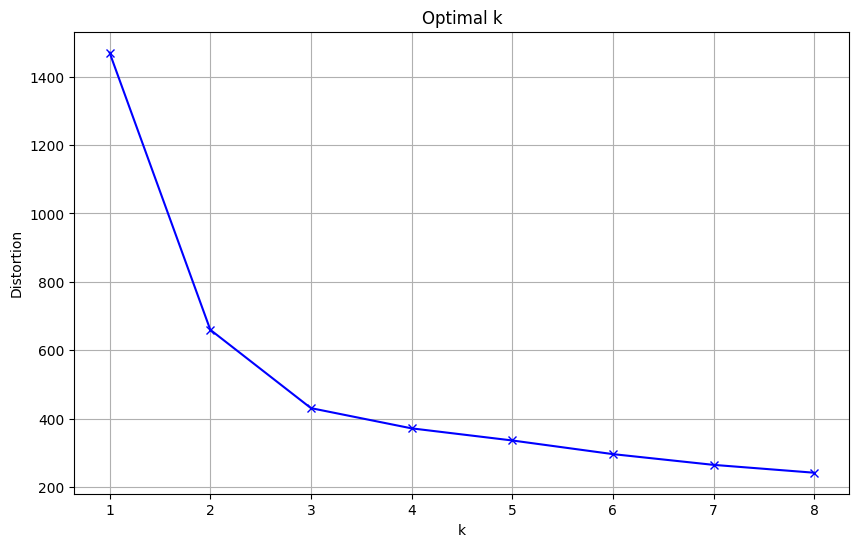

In [37]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
  
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Optimal k')
plt.grid(True)
plt.show()

In [38]:
import random
np.random.seed(42)
random.seed(42)

In [40]:
selected_features = random.sample(columns[:-1], 2)
print(selected_features)

['area', 'asymmetry']


In [41]:
X = data[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

In [42]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

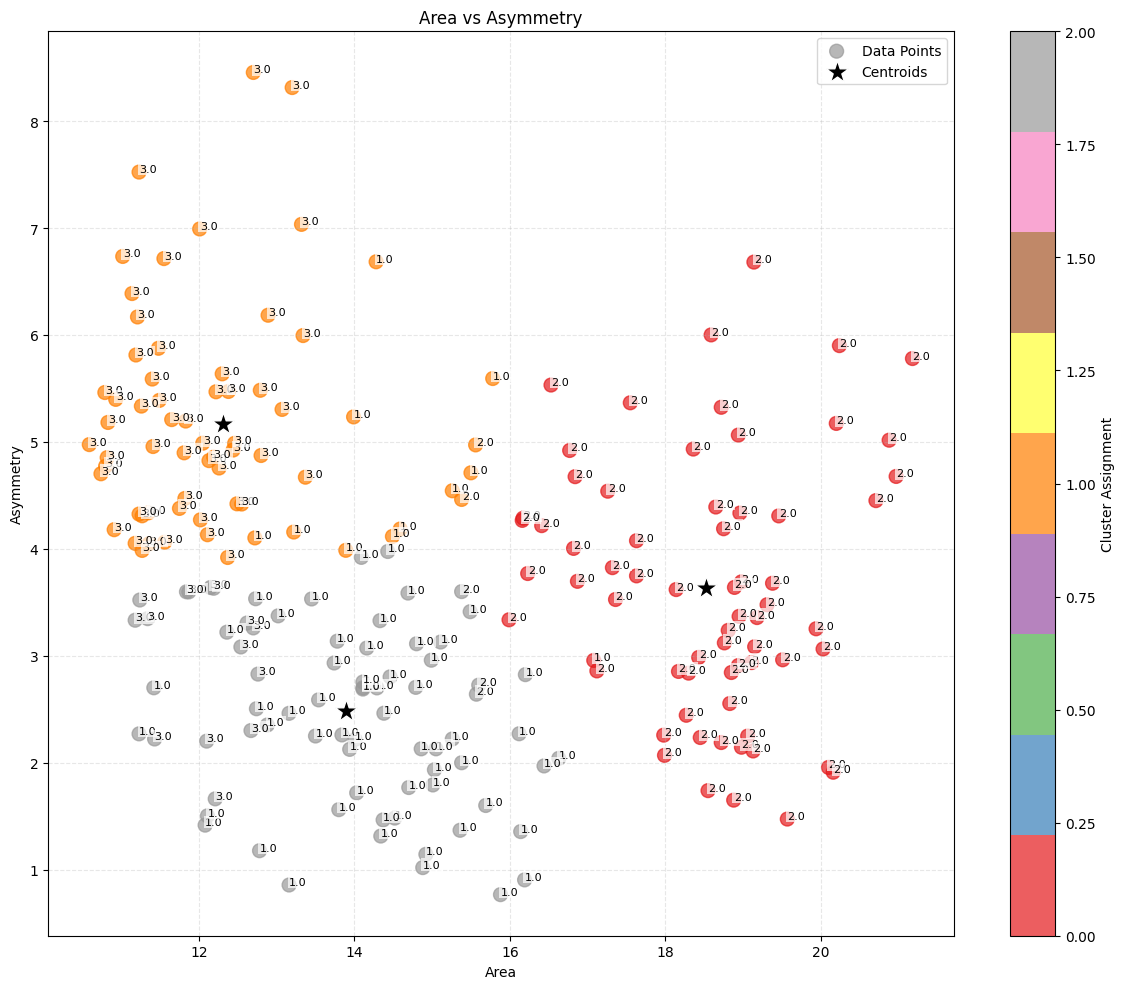

In [43]:
# references: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html                
fig, ax = plt.subplots(figsize=(12, 10))
scatter = ax.scatter(X['area'], 
                     X['asymmetry'],
                    c=cluster_labels,
                    cmap='Set1',
                    s=100,
                    alpha=0.7,
                    label='Data Points')

# plot centroids
ax.scatter(centroids[:, 0], 
           centroids[:, 1],
           color='black',       
           marker='*',  
           s=300,   
           label='Centroids',
           edgecolor='white', 
           linewidth=1)

for idx, row in data.iterrows():
    ax.text(row['area'], 
            row['asymmetry'], 
            str(row['class']),
            fontsize=8,
            bbox={'facecolor': 'white', 'alpha': 0.7, 'edgecolor': 'none', 'pad': 1})

ax.set_xlabel('Area')
ax.set_ylabel('Asymmetry')
ax.set_title('Area vs Asymmetry')
ax.grid(True, linestyle='--', alpha=0.3)

plt.colorbar(scatter, label='Cluster Assignment')
ax.legend()
plt.tight_layout()
plt.show()

In [44]:
for cluster in range(k):
    cluster_data = data[cluster_labels == cluster]
    classes = cluster_data['class'].tolist()
    count_one = classes.count(1)
    count_two = classes.count(2)
    count_three = classes.count(3)
    
    if count_one >= count_two and count_one >= count_three:
        majority_class = 1
    elif count_two >= count_one and count_two >= count_three:
        majority_class = 2
    else:
        majority_class = 3

    print(f"Cluster: {cluster} and Assigned Label: {majority_class}")
    print("Centroid:")
    for idx, feature in enumerate(selected_features): 
        print(f"   {feature}: {centroids[cluster][idx]:.4f}")
    print()

Cluster: 0 and Assigned Label: 2
Centroid:
   area: 18.5302
   asymmetry: 3.6317

Cluster: 1 and Assigned Label: 3
Centroid:
   area: 12.3133
   asymmetry: 5.1703

Cluster: 2 and Assigned Label: 1
Centroid:
   area: 13.8961
   asymmetry: 2.4797



In [45]:
# rescale
features_subset = data[['area', 'asymmetry']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_subset)

In [46]:
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # run it multiple times to get the BEST result
cluster_labels = kmeans.fit_predict(X_scaled)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

In [47]:
largest_clusters = {1: (0, 0), 2: (0, 0), 3: (0, 0)}

for cluster in range(k):
    cluster_data = data[cluster_labels == cluster]
    classes = cluster_data['class'].tolist()
    count_one = classes.count(1)
    count_two = classes.count(2)
    count_three = classes.count(3)
    
    if count_one >= count_two and count_one >= count_three:
        majority_class = 1
        if count_one > largest_clusters[1][1]:
            largest_clusters[1] = (cluster, count_one)
    elif count_two >= count_one and count_two >= count_three:
        majority_class = 2
        if count_two > largest_clusters[2][1]:
            largest_clusters[2] = (cluster, count_two)
    else:
        majority_class = 3
        if count_three > largest_clusters[3][1]:
            largest_clusters[3] = (cluster, count_three)

    print(f"Cluster: {cluster} and Assigned Label: {majority_class}")
    print("Centroid:")
    for idx, feature in enumerate(selected_features):
        print(f"   {feature}: {centroids[cluster][idx]:.4f}")
    print()

Cluster: 0 and Assigned Label: 3
Centroid:
   area: 12.3068
   asymmetry: 4.9864

Cluster: 1 and Assigned Label: 1
Centroid:
   area: 14.1128
   asymmetry: 2.3291

Cluster: 2 and Assigned Label: 2
Centroid:
   area: 18.5302
   asymmetry: 3.6317



In [48]:
# get centroids for largest clusters
representative_centroids = {1: centroids[largest_clusters[1][0]], 2: centroids[largest_clusters[2][0]], 3: centroids[largest_clusters[3][0]]}

In [49]:
X_test = data[selected_features].values
predictions = []

for point in X_test:
    distances = {}
    
    # distances to clusters
    mu_A = representative_centroids[1]
    dist_to_A = np.linalg.norm(point - mu_A)
    distances[1] = dist_to_A
    
    mu_B = representative_centroids[2]
    dist_to_B = np.linalg.norm(point - mu_B)
    distances[2] = dist_to_B

    mu_C = representative_centroids[3]
    dist_to_C = np.linalg.norm(point - mu_C)
    distances[3] = dist_to_C

    min_distance = float('inf')
    nearest_cluster = None
    for cluster_label, distance in distances.items():
        if distance < min_distance:
            min_distance = distance
            nearest_cluster = cluster_label
    
    predictions.append(nearest_cluster)

predictions = np.array(predictions)

In [50]:
print(f"accuracy for all 3 classes: {accuracy_score(data['class'], predictions):.4f}")

accuracy for all 3 classes: 0.8905


In [51]:
# class 3 -> 1, class 1 -> 0
print(f"Accuracy: {accuracy_score((data.loc[data['class'].isin([1, 3]), 'class'] == 3).astype(int), (predictions[data['class'].isin([1, 3])] == 3).astype(int)):.4f}")

Accuracy: 0.9000


In [52]:
print("Class 1 vs 3:")
compute_metrics((data.loc[data['class'].isin([1, 3]), 'class'] == 3).astype(int), (predictions[data['class'].isin([1, 3])] == 3).astype(int))

Class 1 vs 3:


,TP,FP,TN,FN,Accuracy,TPR,TNR
0,63,7,63,7,0.9,0.9,0.9


In [53]:
print("Confusion Matrix:")
print(confusion_matrix((data.loc[data['class'].isin([1, 3]), 'class'] == 3).astype(int), (predictions[data['class'].isin([1, 3])] == 3).astype(int)))

Confusion Matrix:
[[63  7]
 [ 7 63]]


In [54]:
new_k_means_classifier_metrics = compute_metrics((data.loc[data['class'].isin([1, 3]), 'class'] == 3).astype(int), (predictions[data['class'].isin([1, 3])] == 3).astype(int))
new_k_means_classifier_metrics.index = ['New Classifier']

all_metrics = pd.concat([all_metrics, new_k_means_classifier_metrics])
all_metrics

,TP,FP,TN,FN,Accuracy,TPR,TNR
Linear SVM,29,4,35,2,0.914286,0.935484,0.897436
Gaussian SVM,30,4,35,1,0.928571,0.967742,0.897436
Polynomial SVM,30,9,30,1,0.857143,0.967742,0.769231
Logistic Regression,29,4,35,2,0.914286,0.935484,0.897436
New Classifier,63,7,63,7,0.900000,0.900000,0.900000
